In [331]:
import json
# loads a file into jupyter
with open('/Users/lincolntrelease/Desktop/secrets/secrets/credentials.json') as f:
    data = json.load(f)

    connection_string = data['mongodb']
# verifies my file has loaded correctly
print(f"My connection string is {len(connection_string)} characters in length.")

My connection string is 68 characters in length.


In [332]:
pip install pymongo

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


77964.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [333]:
import pymongo
import certifi

mongo_connection_string = data['mongodb']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

db = client['DA_Assignment']

allCollections = db.list_collection_names()

print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['Metacritic Movies', 'IMDB Superhero', 'IMDB_Pipeline']


In [334]:
import re
import pandas as pd

imdb_view = pd.DataFrame(db['IMDB_Pipeline'].find({'release_year': re.compile(r"2008")}))

metacritic_view = pd.DataFrame(db['Metacritic Movies'].find({'release_date': re.compile(r"2008")}))

imdb_view.head()



,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,mpaa_ratingtrimmed,release_date_split,release_year
0,652c26a3db5b84b6e699550d,936501,Taken,90.0,7,595730,"[TV-14, (DLSV, TV Rating.)]",2008-02-16,19407740.0,NaN,226830568.0,"[Action, Crime, Thriller]","[Liam Neeson, Maggie Grace, Leland Orser, Jon ...",[Pierre Morel],"[Luc Besson, Didier Hoarau, Franck Lebreton, M...","[EuropaCorp, M6 Films, Grive Productions, Griv...",TV-14,"[2008, 02, 16T00:00:00.000Z]",2008
1,652c26a3db5b84b6e6995510,1023111,Never Back Down,113.0,6,101165,[PG-13],2008-03-04,20000000.0,8603195.0,NaN,"[Action, Drama, Sport]","[Sean Faris, Amber Heard, Cam Gigandet, Evan P...",[Jeff Wadlow],"[Bill Bannerman, Craig Baumgarten, David Zelon]","[Summit Entertainment, Mandalay Independent Pi...",PG-13,"[2008, 03, 04T00:00:00.000Z]",2008
2,652c26a3db5b84b6e6995513,887912,The Hurt Locker,131.0,7,446433,[R],2008-09-04,15000000.0,145352.0,49230772.0,"[Drama, Thriller, War]","[Jeremy Renner, Anthony Mackie, Brian Geraghty...",[Kathryn Bigelow],"[Kathryn Bigelow, Mark Boal, Nicolas Chartier,...","[Voltage Pictures, Grosvenor Park Media, Film ...",R,"[2008, 09, 04T00:00:00.000Z]",2008
3,652c26a3db5b84b6e6995515,443649,"10,000 BC",109.0,5,130676,[TV-PG],2008-02-22,105000000.0,35867488.0,269784201.0,"[Action, Adventure, Drama, Fantasy, History]","[Steven Strait, Camilla Belle, Cliff Curtis, J...",[Roland Emmerich],"[Aaron Boyd, Sarah Bradshaw, Roland Emmerich, ...","[Warner Bros., Legendary Entertainment, Centro...",TV-PG,"[2008, 02, 22T00:00:00.000Z]",2008
4,652c26a3db5b84b6e699551c,1029234,Martyrs,99.0,7,92525,"[TV-MA, (TV rating)]",2008-05-22,3390000.0,NaN,NaN,[Horror],"[Morjana Alaoui, Mylène Jampanoï, Catherine Bé...",[Pascal Laugier],"[Frédéric Doniguian, Marcel Giroux, Richard Gr...","[Eskwad, Wild Bunch, TCB Film, Canal Horizons,...",TV-MA,"[2008, 05, 22T00:00:00.000Z]",2008


In [335]:
metacritic_view.score = pd.to_numeric(metacritic_view.score, errors='coerce')
metacritic_view.release_date = pd.to_datetime(metacritic_view.release_date, errors='coerce')

In [336]:
unified_view = pd.merge(imdb_view, metacritic_view, how="inner", on="title")
unified_view.head()

,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,company,mpaa_ratingtrimmed,release_date_split,release_year,_id_y,movie_id,release_date_y,description,score,thumbnail
0,652c26a3db5b84b6e6995510,1023111,Never Back Down,113.0,6,101165,[PG-13],2008-03-04,20000000.0,8603195.0,...,"[Summit Entertainment, Mandalay Independent Pi...",PG-13,"[2008, 03, 04T00:00:00.000Z]",2008,652c2688db5b84b6e699064a,15160,2008-03-14,"Jake Tyler never goes looking for trouble, but...",39,https://static.metacritic.com/images/products/...
1,652c26a3db5b84b6e6995515,443649,"10,000 BC",109.0,5,130676,[TV-PG],2008-02-22,105000000.0,35867488.0,...,"[Warner Bros., Legendary Entertainment, Centro...",TV-PG,"[2008, 02, 22T00:00:00.000Z]",2008,652c2688db5b84b6e6990665,15187,2008-03-07,"In a remote mountain tribe, the young hunter D...",34,https://static.metacritic.com/images/products/...
2,652c26a3db5b84b6e699551f,493464,Wanted,110.0,6,384226,[R],2008-06-12,75000000.0,217432.0,...,"[Universal Pictures, Spyglass Entertainment, R...",R,"[2008, 06, 12T00:00:00.000Z]",2008,652c2688db5b84b6e6990573,14945,2008-06-27,Wanted tells the tale of one apathetic nobody’...,64,https://static.metacritic.com/images/products/...
3,652c26a3db5b84b6e69954fd,1099212,Twilight,122.0,5,455845,[PG-13],2008-11-17,37000000.0,69637740.0,...,"[Summit Entertainment, Temple Hill Entertainme...",PG-13,"[2008, 11, 17T00:00:00.000Z]",2008,652c2688db5b84b6e69905d3,15041,2008-11-21,Bella Swan has always been a little bit differ...,56,https://static.metacritic.com/images/products/...
4,652c26a3db5b84b6e699550e,976051,The Reader,124.0,7,242560,[R],2008-12-10,32000000.0,NaN,...,"[The Weinstein Company, Mirage Enterprises, St...",R,"[2008, 12, 10T00:00:00.000Z]",2008,652c2688db5b84b6e69905af,15005,2008-12-10,The Reader opens in post-WWII Germany when tee...,58,https://static.metacritic.com/images/products/...


In [337]:
pip install statsmodels


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


77972.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [338]:
import statsmodels.formula.api

ols_model = statsmodels.formula.api.ols(
    formula = "gross_sales ~ user_rating + budget + opening_weekend + votes + runtime + score",
    data=unified_view).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     70.66
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           6.56e-30
Time:                        14:58:15   Log-Likelihood:                -1700.2
No. Observations:                  87   AIC:                             3414.
Df Residuals:                      80   BIC:                             3432.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.392e+07   6.56e+07     

In [339]:
pip install tokenizers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


77978.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [340]:
pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


77984.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [341]:
pip install sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


77991.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [342]:
pip install protobuf

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


77997.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [343]:
pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


78003.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [344]:
import transformers
import tokenizers
import sentencepiece
import tensorflow

MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

print(sentiment_task("Covid cases are increasing fast."))
print(sentiment_task("I got icecream today"))
print(sentiment_task("Stephen King wrote it"))


All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


[{'label': 'negative', 'score': 0.6003882884979248}]
[{'label': 'positive', 'score': 0.7880100607872009}]
[{'label': 'neutral', 'score': 0.6247870326042175}]


In [345]:
def calculate_sentiment(text):
    if text is None:
        return 0
    sentiment = sentiment_task(text)
    if sentiment[0]['label'] == 'negative':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral':
        return sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'positive':
        return 1 + sentiment[0]['score'] - 0.5

print(calculate_sentiment("Covid cases are increasing fast."))
print(calculate_sentiment("I got icecream today!"))
print(calculate_sentiment("Stephen King wrote it"))
print(calculate_sentiment(None))

-1.1003882884979248
1.3790138959884644
0.12478703260421753
0


In [346]:
sentiment_column = unified_view.apply(lambda row : calculate_sentiment(row.get('description')), axis = 1)

unified_view["sentiment"] = sentiment_column

unified_view.head()

,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,mpaa_ratingtrimmed,release_date_split,release_year,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,652c26a3db5b84b6e6995510,1023111,Never Back Down,113.0,6,101165,[PG-13],2008-03-04,20000000.0,8603195.0,...,PG-13,"[2008, 03, 04T00:00:00.000Z]",2008,652c2688db5b84b6e699064a,15160,2008-03-14,"Jake Tyler never goes looking for trouble, but...",39,https://static.metacritic.com/images/products/...,-0.973009
1,652c26a3db5b84b6e6995515,443649,"10,000 BC",109.0,5,130676,[TV-PG],2008-02-22,105000000.0,35867488.0,...,TV-PG,"[2008, 02, 22T00:00:00.000Z]",2008,652c2688db5b84b6e6990665,15187,2008-03-07,"In a remote mountain tribe, the young hunter D...",34,https://static.metacritic.com/images/products/...,-0.942341
2,652c26a3db5b84b6e699551f,493464,Wanted,110.0,6,384226,[R],2008-06-12,75000000.0,217432.0,...,R,"[2008, 06, 12T00:00:00.000Z]",2008,652c2688db5b84b6e6990573,14945,2008-06-27,Wanted tells the tale of one apathetic nobody’...,64,https://static.metacritic.com/images/products/...,-1.033164
3,652c26a3db5b84b6e69954fd,1099212,Twilight,122.0,5,455845,[PG-13],2008-11-17,37000000.0,69637740.0,...,PG-13,"[2008, 11, 17T00:00:00.000Z]",2008,652c2688db5b84b6e69905d3,15041,2008-11-21,Bella Swan has always been a little bit differ...,56,https://static.metacritic.com/images/products/...,-0.947488
4,652c26a3db5b84b6e699550e,976051,The Reader,124.0,7,242560,[R],2008-12-10,32000000.0,NaN,...,R,"[2008, 12, 10T00:00:00.000Z]",2008,652c2688db5b84b6e69905af,15005,2008-12-10,The Reader opens in post-WWII Germany when tee...,58,https://static.metacritic.com/images/products/...,-1.057046


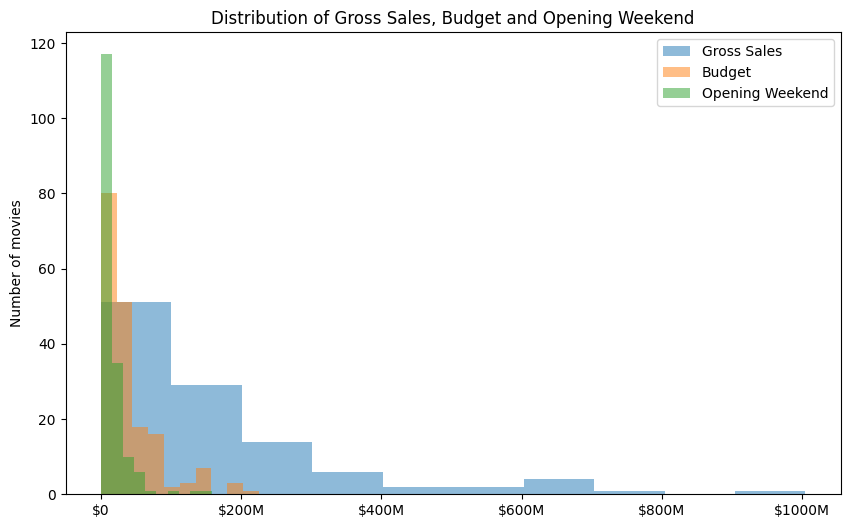

In [347]:

import matplotlib.pyplot as plt
import numpy as np
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
plt.figure(figsize=(10,6))
plt.ylabel('Number of movies')
plt.title('Distribution of Gross Sales, Budget and Opening Weekend')
plt.hist(unified_view['gross_sales'], alpha=.5, label='Gross Sales')
plt.hist(unified_view['budget'], alpha=.5, label='Budget')
plt.hist(unified_view['opening_weekend'], alpha =.5, label='Opening Weekend')
plt.legend(loc='upper right')
plt.gca().xaxis.set_major_formatter(format_currency)
plt.show()


<Figure size 640x480 with 0 Axes>

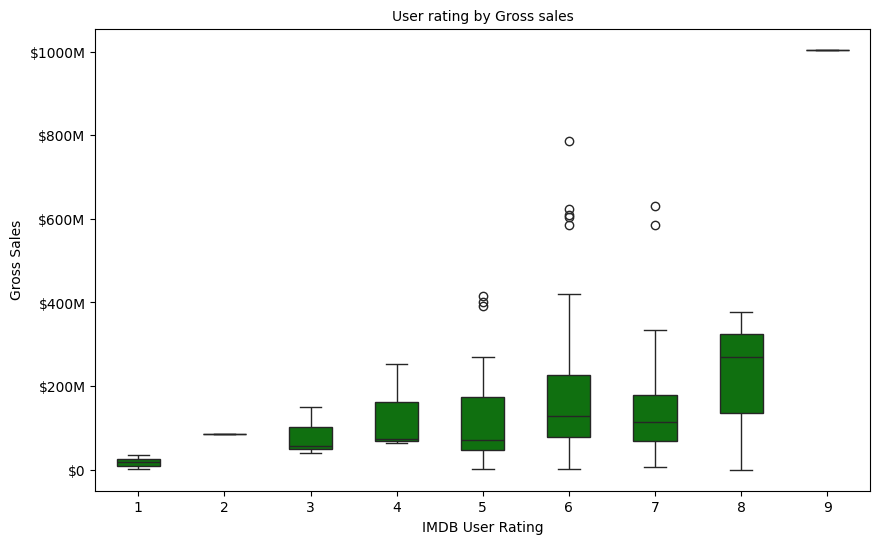

In [348]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.despine()
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
plt.figure(figsize=(10,6))
plt.title('User rating by Gross sales', fontsize = 10)
plt.ylabel('Gross Sales')
plt.xlabel('IMDB User Rating')
seaborn.boxplot(y='gross_sales', x='user_rating', data= unified_view, color="green", orient='v', width=.5)
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()

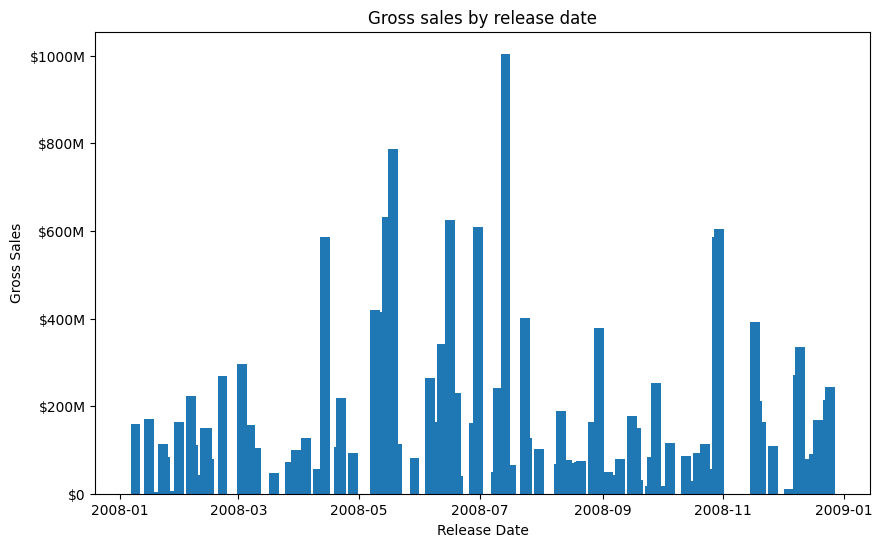

In [349]:
import matplotlib.pyplot as plt
import numpy as np

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
plt.figure(figsize=(10,6))
plt.title('Gross sales by release date')
plt.xlabel('Release Date')
plt.ylabel('Gross Sales')
plt.bar(unified_view['release_date_x'], unified_view['gross_sales'], width = 5)
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()

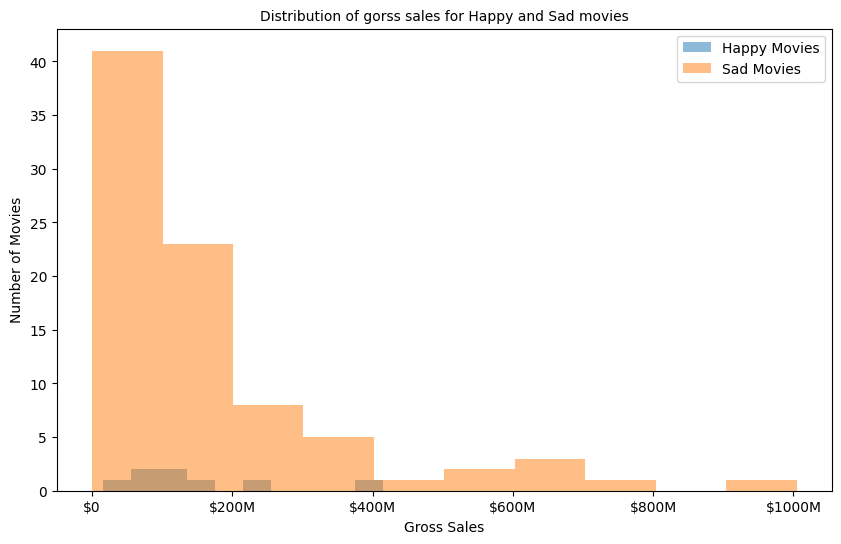

In [350]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
happy_movies = unified_view[unified_view['sentiment']>.5].gross_sales
sad_movies = unified_view[unified_view['sentiment']<-.5].gross_sales
plt.figure(figsize=(10,6))
seaborn.despine()
plt.title('Distribution of gorss sales for Happy and Sad movies', fontsize = 10)
plt.ylabel('Number of Movies')
plt.xlabel('Gross Sales')
plt.hist(happy_movies, alpha = .5, label= 'Happy Movies')
plt.hist(sad_movies, alpha =.5, label = 'Sad Movies')
plt.legend(loc='upper right')
plt.gca().xaxis.set_major_formatter(format_currency)
plt.show()

What factors influence a movies gross sales?
When we plot the distributions of budget, opening weekend, and gross sales we notice a couple things. In general budget and opening weekend are condensed. This would indicate that movies tend to have similar budgets and similar sales on opening weekends. There might be highly antiicipated movies that have higher budgets and do very well on opening weekend but in general most movies are similar. However, we we look at the distributions of gross sales, it is more spread out. This would indicate that gross sales might just be influenced by how people view the movie. To get a better sense of this, I plotted the distribution of gross sales vs user rating and it looks like only movies with a IMDB rating of 8 tend to have higher gross sales. The other IMDB ratings seem to be fairly even in terms of gross sales. 
Release date could also be a factor impacting gross sales. When we plot this using a bar graph, some interesting things stand out. Movies released at the beggining of the year seem to not have very high sales compared to movies released in the summer and end of the year. This could indicate the quality of movies released early in the year isn't as good as movies released later in the year. 
Lastly, comparing the type of movie to gross sales doesn't tell us much about gross sales but there is a clear trend that a lot more movies seem to be sad than happy. This could indicate what types of movies people are interested in seeing. It would be interesting to plot the distribution of sentiment scores compared to genres to get a better picture of how genre type compares to sentiment score. 